In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pickle
from matplotlib import pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import Formatter
import os
import glob

server = "zt_94_02"
readPath = os.path.join(r'\\192.168.10.30\Kevin_zhenyu\check\20200306', server)
dataPathLs = np.array(glob.glob(os.path.join(readPath,'full_20200306***.tar.gz')))
accountLs = np.array([os.path.basename(i).split('_')[6].split('.')[0] for i in dataPathLs])
path = []
for i in accountLs:
    dataPathLs = np.array(glob.glob(os.path.join(readPath, "full_20200306_" + server + '_day_' + i, "mdLog_SH***")))
    for j in dataPathLs:
        if int(os.path.basename(j).split('_')[3].split('.')[0]) <= 1456:
            path.append(j)
display(path)
if len(path) == 2:
    logSH1 = pd.read_csv(path[0],encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSH2 = pd.read_csv(path[1],encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSH1["exes"] = int(accountLs[0])
    logSH2["exes"] = int(accountLs[1])
    print(logSH1["time"].iloc[0])
    print(logSH2["time"].iloc[0])

if len(path) == 3:
    logSH1 = pd.read_csv(path[0],encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSH2 = pd.read_csv(path[1],encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSH3 = pd.read_csv(path[2],encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSH1["exes"] = int(accountLs[0])
    logSH2["exes"] = int(accountLs[1])
    logSH3["exes"] = int(accountLs[2])
    print(logSH1["time"].iloc[0])
    print(logSH2["time"].iloc[0])
    print(logSH3["time"].iloc[0])
    

['\\\\192.168.10.30\\Kevin_zhenyu\\check\\20200306\\zt_94_02\\full_20200306_zt_94_02_day_9551\\mdLog_SH_20200306_0831.csv',
 '\\\\192.168.10.30\\Kevin_zhenyu\\check\\20200306\\zt_94_02\\full_20200306_zt_94_02_day_9561\\mdLog_SH_20200306_0831.csv']

08:31:25.000
08:31:27.890


In [2]:
server = "zt_94_02"
readPath = "E:\\"
dataPathLs = []

dataPathLs = np.array(glob.glob(readPath + "sec_***_" + server + ".csv"))

df = pd.read_csv(dataPathLs[0], encoding="utf-8")
sl = df[df["inStrategy"] == 1]["secName"].str[2:].astype(int).values
print(df[df["inStrategy"] == 1]["secName"].str[:2].unique())

for i in dataPathLs[1:]:
    df = pd.read_csv(i, encoding="utf-8")
    list1 = df[df["inStrategy"] == 1]["secName"].str[2:].astype(int).values
    sl = list(set(sl) | set(list1))

['SH']


In [3]:
if len(logSH1["time"].iloc[0]) == 12:
    if len(path) == 2:
        logSH1["time"] = logSH1["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSH2["time"] = logSH2["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSH1 = logSH1[(logSH1["time"] >= 93000000) & (logSH1["time"] <= 145655000)]
        logSH2 = logSH2[(logSH2["time"] >= 93000000) & (logSH2["time"] <= 145655000)]
        logSH1 = logSH1[logSH1["StockID"].isin(sl)]
        logSH2 = logSH2[logSH2["StockID"].isin(sl)]
        l1 = logSH1["StockID"].unique()
        l2 = logSH2["StockID"].unique()
        c12 = list(set(l1) & set(l2))
        display(len(l1))
        display(len(l2))    
        display(len(c12))
    if len(path) == 3:
        logSH1["time"] = logSH1["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSH2["time"] = logSH2["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSH3["time"] = logSH3["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSH1 = logSH1[(logSH1["time"] >= 93000000) & (logSH1["time"] <= 145655000)]
        logSH2 = logSH2[(logSH2["time"] >= 93000000) & (logSH2["time"] <= 145655000)]
        logSH3 = logSH3[(logSH3["time"] >= 93000000) & (logSH3["time"] <= 145655000)]
        logSH1 = logSH1[logSH1["StockID"].isin(sl)]
        logSH2 = logSH2[logSH2["StockID"].isin(sl)]
        logSH3 = logSH3[logSH3["StockID"].isin(sl)]
        l1 = logSH1["StockID"].unique()
        l2 = logSH2["StockID"].unique()
        l3 = logSH3["StockID"].unique()
        c123 = list(set(l1) & set(l2) & set(l3))
        display(len(l1))
        display(len(l2))
        display(len(l3))
        display(len(c123))

if len(logSH1["time"].iloc[0]) == 8:
    if len(path) == 2:
        logSH1["time"] = logSH1["time"].apply(lambda x: int((x.replace(':', ""))))
        logSH2["time"] = logSH2["time"].apply(lambda x: int((x.replace(':', ""))))
        logSH1["time"] = logSH1["time"] * 1000
        logSH2["time"] = logSH2["time"] * 1000
        logSH1 = logSH1[(logSH1["time"] >= 93000000) & (logSH1["time"] <= 145655000)]
        logSH2 = logSH2[(logSH2["time"] >= 93000000) & (logSH2["time"] <= 145655000)]
        logSH1 = logSH1[(logSH1["StockID"] >= 600000) & (logSH1["StockID"] < 700000)]
        logSH2 = logSH2[(logSH2["StockID"] >= 600000) & (logSH2["StockID"] < 700000)]
        logSH1 = logSH1[logSH1["StockID"].isin(sl)]
        logSH2 = logSH2[logSH2["StockID"].isin(sl)]
        l1 = logSH1["StockID"].unique()
        l2 = logSH2["StockID"].unique()
        c12 = list(set(l1) & set(l2))
        display(len(l1))
        display(len(l2))    
        display(len(c12))
    if len(path) == 3:
        logSH1["time"] = logSH1["time"].apply(lambda x: int((x.replace(':', ""))))
        logSH2["time"] = logSH2["time"].apply(lambda x: int((x.replace(':', ""))))
        logSH3["time"] = logSH3["time"].apply(lambda x: int((x.replace(':', ""))))
        logSH1["time"] = logSH1["time"] * 1000
        logSH2["time"] = logSH2["time"] * 1000
        logSH3["time"] = logSH3["time"] * 1000
        logSH1 = logSH1[(logSH1["time"] >= 93000000) & (logSH1["time"] <= 145655000)]
        logSH2 = logSH2[(logSH2["time"] >= 93000000) & (logSH2["time"] <= 145655000)]
        logSH3 = logSH3[(logSH3["time"] >= 93000000) & (logSH3["time"] <= 145655000)]
        logSH1 = logSH1[(logSH1["StockID"] >= 600000) & (logSH1["StockID"] < 700000)]
        logSH2 = logSH2[(logSH2["StockID"] >= 600000) & (logSH2["StockID"] < 700000)]
        logSH3 = logSH3[(logSH3["StockID"] >= 600000) & (logSH3["StockID"] < 700000)]
        logSH1 = logSH1[logSH1["StockID"].isin(sl)]
        logSH2 = logSH2[logSH2["StockID"].isin(sl)]
        logSH3 = logSH3[logSH3["StockID"].isin(sl)]
        l1 = logSH1["StockID"].unique()
        l2 = logSH2["StockID"].unique()
        l3 = logSH3["StockID"].unique()
        c123 = list(set(l1) & set(l2) & set(l3))
        display(len(l1))
        display(len(l2))
        display(len(l3))
        display(len(c123))


548

548

548

TypeError: object of type 'numpy.int64' has no len()

In [4]:
columns = ["StockID", "cum_volume", "cum_amount", "close", "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q", "bid2q",
           "bid3q", "bid4q", "bid5q", "ask1p", "ask2p", "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
           "ask4q", "ask5q", "openPrice"]
d1 = logSH1[logSH1["StockID"].isin(c123)]
d1 = d1[~d1.duplicated(columns, keep="first")].reset_index(drop=True)
d2 = logSH2[logSH2["StockID"].isin(c123)]
d2 = d2[~d2.duplicated(columns, keep="first")].reset_index(drop=True)
d3 = logSH3[logSH3["StockID"].isin(c123)]
d3 = d3[~d3.duplicated(columns, keep="first")].reset_index(drop=True)
d = pd.concat([d1, d2, d3]).reset_index(drop=True)
de = d[d.duplicated(columns, keep=False)]
de1 = de[de["exes"] == int(accountLs[0])]
de2 = de[de["exes"] == int(accountLs[1])]
de3 = de[de["exes"] == int(accountLs[2])]
de = pd.merge(de1, de2, on=columns)
del de1
del de2
de = de.rename(columns={"clockAtArrival_x": "caa1", "clockAtArrival_y": "caa2", "time_x": "time1", "time_y": "time2"})
de = pd.merge(de, de3, on=columns)
del de3
de = de.rename(columns={"clockAtArrival": "caa3", "time": "time3"})
de["caa_max"] = de[["caa1", "caa2", "caa3"]].max(axis=1)
de["caa_min"] = de[["caa1", "caa2", "caa3"]].min(axis=1)
de["jitter"] = de["caa_max"] - de["caa_min"]
display(de["time1"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
# check distribution of abs(difference)
display(de["jitter"].abs().quantile(0.5))
display(de["jitter"].abs().describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(de["jitter"].abs()[de["jitter"].abs() <= de["jitter"].abs().quantile(0.95)])
plt.show()
de["faster"] = np.where(de["caa_min"] == de["caa1"], int(accountLs[0]), np.where(
de["caa_min"] == de["caa2"], int(accountLs[1]), int(accountLs[2])))
de[["time1", "faster", "jitter"]].to_pickle("E:\\jitter\\data\\" + server + "_SSE_snapshot.pkl")
# check mornings and afternoons are the same, check numbers don't change across days
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[2]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[2]))].head(30))

mo = de[de["time1"] <= 93500000]
el = de[de["time1"] > 93500000]

n1 = mo["jitter"].abs().quantile(.5)
n2 = el["jitter"].abs().quantile(.5)
de1 = el.groupby(["faster"])["jitter"].count().reset_index()
de1 = de1.rename(columns={"jitter": "fastest_RestOfDay"})
de1 = pd.concat([de1, el.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_RestOfDay"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].count().reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "fastest_MktOpen"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_MktOpen"})
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"] / de1["fastest_RestOfDay"].sum()
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"].apply(lambda x: '%.f%%'%(x*100))
de1["fastest_MktOpen"] = de1["fastest_MktOpen"] / de1["fastest_MktOpen"].sum()
de1["fastest_MktOpen"] = de1["fastest_MktOpen"].apply(lambda x: '%.f%%'%(x*100))
de1["jitter_RestOfDay"] = de1["jitter_RestOfDay"].abs()
de1["jitter_MktOpen"] = de1["jitter_MktOpen"].abs()
de1 = de1.rename(columns={"faster": "account"})
de1.loc[-1] = ["total", "", n2, "", n1]
de1.index = de1.index + 1
de1.sort_index(inplace=True)

list1 = de[de["faster"] == int(accountLs[0])]["time1"].describe([0.05, 0.5, 0.95])
list2 = de[de["faster"] == int(accountLs[1])]["time1"].describe([0.05, 0.5, 0.95])
list3 = de[de["faster"] == int(accountLs[2])]["time1"].describe([0.05, 0.5, 0.95])
t1 = [np.nan, list1["5%"], list2["5%"], list3["5%"]]
t2 = [np.nan, list1["50%"], list2["50%"], list3["50%"]]
t3 = [np.nan, list1["95%"], list2["95%"], list3["95%"]]
de1["time_5p"] = pd.Series(t1)
de1["time_50p"] = pd.Series(t2)
de1["time_95p"] = pd.Series(t3)
de1["cat"] = "SSE snapshot"
for col in ["time_5p", "time_50p", "time_95p"]:
        de1[col] = de1[col].fillna(1)
        de1[col] = de1[col].astype(int)
        de1[col] = np.where(de1[col] == 1, '', de1[col])
de1 = de1.fillna("")
de1 = de1.loc[:, ["cat", "account", "fastest_MktOpen", "jitter_MktOpen", "fastest_RestOfDay", "jitter_RestOfDay",
                 "time_5p", "time_50p", "time_95p"]]
de1.to_csv("E:\\jitter\\result\\" + server + "_SSE_snapshot.csv", encoding="utf-8")
de1

NameError: name 'c123' is not defined

count    4.364630e+06
mean     1.200224e+08
std      1.855243e+07
min      9.300000e+07
10%      9.515000e+07
20%      1.014285e+08
30%      1.037510e+08
40%      1.102408e+08
50%      1.127550e+08
60%      1.322410e+08
70%      1.346550e+08
80%      1.411050e+08
90%      1.434556e+08
max      1.456550e+08
Name: time1, dtype: float64

15.0

count    4.364630e+06
mean     3.293218e+02
std      3.630884e+03
min      0.000000e+00
10%      3.000000e+00
20%      5.000000e+00
30%      8.000000e+00
40%      1.100000e+01
50%      1.500000e+01
60%      1.900000e+01
70%      2.600000e+01
80%      3.800000e+01
90%      2.580000e+02
max      1.027300e+05
Name: jitter, dtype: float64

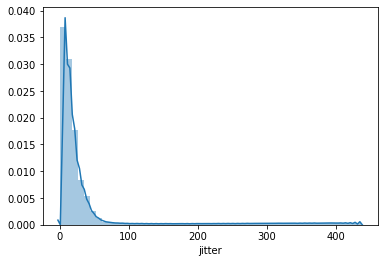

,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
0,1583458198682438,3047943,4,600535,SH,93000000,146500,2283935.00,15.59,15.57,...,1583458198682467,3047840,4,SH,93000000,9561,1583458198682467,1583458198682438,29,9551
1,1583458198682443,3047944,4,601398,SH,93000000,4304800,23322107.00,5.41,5.41,...,1583458198682475,3047841,4,SH,93000000,9561,1583458198682475,1583458198682443,32,9551
2,1583458198689905,3048359,4,600352,SH,93000000,1531200,23075184.00,15.07,15.07,...,1583458198689971,3048256,4,SH,93000000,9561,1583458198689971,1583458198689905,66,9551
3,1583458198689912,3048360,4,600550,SH,93000000,2475643,15051909.44,6.08,6.08,...,1583458198689978,3048257,4,SH,93000000,9561,1583458198689978,1583458198689912,66,9551
4,1583458198689926,3048363,4,601890,SH,93000000,308600,1780622.00,5.77,5.77,...,1583458198690001,3048260,4,SH,93000000,9561,1583458198690001,1583458198689926,75,9551
5,1583458198692870,3048370,4,600285,SH,93000000,88300,827496.00,9.38,9.36,...,1583458198693007,3048267,4,SH,93000000,9561,1583458198693007,1583458198692870,137,9551
6,1583458198692878,3048372,4,600318,SH,93000000,3635600,50171280.00,13.80,13.79,...,1583458198693025,3048269,4,SH,93000000,9561,1583458198693025,1583458198692878,147,9551
7,1583458198692892,3048374,4,600517,SH,93000000,3393100,28128799.00,8.29,8.28,...,1583458198693038,3048271,4,SH,93000000,9561,1583458198693038,1583458198692892,146,9551
8,1583458198692895,3048375,4,600529,SH,93000000,14800,531024.00,35.88,35.84,...,1583458198693042,3048272,4,SH,93000000,9561,1583458198693042,1583458198692895,147,9551
10,1583458198693065,3048377,4,600684,SH,93000000,57400,197456.00,3.44,3.43,...,1583458198693130,3048274,4,SH,93000000,9561,1583458198693130,1583458198693065,65,9551


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
2216699,1583470798463639,88074353,4,600069,SH,130000000,70097949,1.742193e+08,2.61,2.61,...,1583470798463661,88074250,4,SH,130000000,9561,1583470798463661,1583470798463639,22,9551
2216700,1583470798463656,88074356,4,600322,SH,130000000,49653476,1.448739e+08,2.91,2.91,...,1583470798463682,88074253,4,SH,130000000,9561,1583470798463682,1583470798463656,26,9551
2216701,1583470798463662,88074357,4,601318,SH,130000000,39218025,3.184952e+09,80.98,80.98,...,1583470798463688,88074254,4,SH,130000000,9561,1583470798463688,1583470798463662,26,9551
2216702,1583470798463668,88074358,4,601588,SH,130000000,15537721,4.644193e+07,2.98,2.98,...,1583470798463696,88074255,4,SH,130000000,9561,1583470798463696,1583470798463668,28,9551
2216703,1583470798472048,88074479,4,603345,SH,130000000,1167453,9.739188e+07,84.02,84.01,...,1583470798472065,88074376,4,SH,130000000,9561,1583470798472065,1583470798472048,17,9551
2216705,1583470798481537,88074519,4,601519,SH,130000000,52336310,4.605462e+08,8.80,8.78,...,1583470798481577,88074416,4,SH,130000000,9561,1583470798481577,1583470798481537,40,9551
2216706,1583470798481542,88074520,4,603590,SH,130000000,2925893,1.141540e+08,39.30,39.29,...,1583470798481582,88074417,4,SH,130000000,9561,1583470798481582,1583470798481542,40,9551
2216708,1583470798492356,88074600,4,600477,SH,130000000,25394127,1.160415e+08,4.58,4.58,...,1583470798492413,88074497,4,SH,130000000,9561,1583470798492413,1583470798492356,57,9551
2216709,1583470798492362,88074601,4,600517,SH,130000000,86308658,7.311426e+08,8.98,8.96,...,1583470798492418,88074498,4,SH,130000000,9561,1583470798492418,1583470798492362,56,9551
2216711,1583470798494623,88074610,4,600383,SH,130000000,22792069,3.422486e+08,14.90,14.87,...,1583470798494626,88074507,4,SH,130000000,9561,1583470798494626,1583470798494623,3,9551


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
9,1583458198693059,3048376,4,600585,SH,93000000,252100,14740283.00,58.46,58.46,...,1583458198693049,3048273,4,SH,93000000,9561,1583458198693059,1583458198693049,10,9561
16,1583458198699407,3048626,4,600810,SH,93000000,3357800,37607360.00,11.20,11.16,...,1583458198699398,3048523,4,SH,93000000,9561,1583458198699407,1583458198699398,9,9561
18,1583458198700000,3048629,4,600050,SH,93000000,2457300,14129475.00,5.75,5.74,...,1583458198699912,3048526,4,SH,93000000,9561,1583458198700000,1583458198699912,88,9561
19,1583458198700014,3048631,4,600498,SH,93000000,1151778,36868413.78,32.01,32.01,...,1583458198699925,3048528,4,SH,93000000,9561,1583458198700014,1583458198699925,89,9561
22,1583458198720658,3050303,4,600096,SH,93000000,286900,1784518.00,6.22,6.21,...,1583458198720643,3050200,4,SH,93000000,9561,1583458198720658,1583458198720643,15,9561
23,1583458198720666,3050304,4,600104,SH,93000000,82300,1925385.00,23.38,23.37,...,1583458198720650,3050201,4,SH,93000000,9561,1583458198720666,1583458198720650,16,9561
24,1583458198720676,3050306,4,600176,SH,93000000,162200,1605780.00,9.90,9.89,...,1583458198720662,3050203,4,SH,93000000,9561,1583458198720676,1583458198720662,14,9561
25,1583458198720687,3050309,4,600512,SH,93000000,6395022,24943391.80,3.91,3.90,...,1583458198720670,3050206,4,SH,93000000,9561,1583458198720687,1583458198720670,17,9561
26,1583458198720689,3050310,4,600570,SH,93000000,220700,21805160.00,98.80,98.77,...,1583458198720672,3050207,4,SH,93000000,9561,1583458198720689,1583458198720672,17,9561
28,1583458198720801,3050313,4,600837,SH,93000000,1639500,25002380.00,15.26,15.25,...,1583458198720790,3050210,4,SH,93000000,9561,1583458198720801,1583458198720790,11,9561


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
2216704,1583470798481523,88074517,4,600550,SH,130000000,10747325,6.534374e+07,6.08,6.08,...,1583470798481506,88074414,4,SH,130000000,9561,1583470798481523,1583470798481506,17,9561
2216707,1583470798492287,88074597,4,600090,SH,130000000,12402671,5.490671e+07,4.42,4.42,...,1583470798492285,88074494,4,SH,130000000,9561,1583470798492287,1583470798492285,2,9561
2216710,1583470798492466,88074606,4,601012,SH,130000000,22693235,6.979972e+08,30.55,30.55,...,1583470798492459,88074503,4,SH,130000000,9561,1583470798492466,1583470798492459,7,9561
2216714,1583470798496503,88074616,4,600016,SH,130000000,49079449,2.895058e+08,5.89,5.88,...,1583470798496465,88074513,4,SH,130000000,9561,1583470798496503,1583470798496465,38,9561
2216734,1583470798517627,88075182,4,601390,SH,130000000,73606711,4.280809e+08,5.78,5.77,...,1583470798517626,88075079,4,SH,130000000,9561,1583470798517627,1583470798517626,1,9561
2216735,1583470798517642,88075184,4,601688,SH,130000000,64659211,1.302221e+09,19.99,19.99,...,1583470798517638,88075081,4,SH,130000000,9561,1583470798517642,1583470798517638,4,9561
2216736,1583470798535043,88075691,4,600010,SH,130000000,180938308,2.209762e+08,1.23,1.22,...,1583470798534931,88075588,4,SH,130000000,9561,1583470798535043,1583470798534931,112,9561
2216737,1583470798535071,88075695,4,600391,SH,130000000,26622882,5.975524e+08,22.21,22.20,...,1583470798534954,88075592,4,SH,130000000,9561,1583470798535071,1583470798534954,117,9561
2216738,1583470798535081,88075697,4,600531,SH,130000000,14842829,6.674267e+07,4.47,4.47,...,1583470798535076,88075594,4,SH,130000000,9561,1583470798535081,1583470798535076,5,9561
2216739,1583470798535099,88075700,4,600989,SH,130000000,86049367,9.153479e+08,10.98,10.98,...,1583470798535097,88075597,4,SH,130000000,9561,1583470798535099,1583470798535097,2,9561


,cat,account,fastest_MktOpen,jitter_MktOpen,fastest_RestOfDay,jitter_RestOfDay,time_5p,time_50p,time_95p
0,SSE snapshot,total,,25.0,,15.0,,,
1,SSE snapshot,9551,43%,19.0,51%,14.0,94207360,112537880,144540000
2,SSE snapshot,9561,57%,40.0,49%,16.0,93928490,130040000,144635950


In [5]:
columns = ["StockID", "cum_volume", "cum_amount", "close", "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q", "bid2q",
           "bid3q", "bid4q", "bid5q", "ask1p", "ask2p", "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
           "ask4q", "ask5q", "openPrice"]
d1 = logSH1[logSH1["StockID"].isin(c12)]
d1 = d1[~d1.duplicated(columns, keep="first")].reset_index(drop=True)
d2 = logSH2[logSH2["StockID"].isin(c12)]
d2 = d2[~d2.duplicated(columns, keep="first")].reset_index(drop=True)
d = pd.concat([d1, d2]).reset_index(drop=True)
de = d[d.duplicated(columns, keep=False)]
de1 = de[de["exes"] == int(accountLs[0])]
de2 = de[de["exes"] == int(accountLs[1])]
de = pd.merge(de1, de2, on=columns)
del de1
del de2
de = de.rename(columns={"clockAtArrival_x": "caa1", "clockAtArrival_y": "caa2", "time_x": "time1", "time_y": "time2"})
de["caa_max"] = de[["caa1", "caa2"]].max(axis=1)
de["caa_min"] = de[["caa1", "caa2"]].min(axis=1)
de["jitter"] = de["caa_max"] - de["caa_min"]
display(de["time1"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
# check distribution of abs(difference)
display(de["jitter"].abs().quantile(0.5))
display(de["jitter"].abs().describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(de["jitter"].abs()[de["jitter"].abs() <= de["jitter"].abs().quantile(0.95)])
plt.show()
de["faster"] = np.where(de["caa_min"] == de["caa1"], int(accountLs[0]), int(accountLs[1]))
de[["time1", "faster", "jitter"]].to_pickle("E:\\jitter\\data\\" + server + "_SSE_snapshot.pkl")
# check mornings and afternoons are the same, check numbers don't change across days
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[1]))].head(30))


mo = de[de["time1"] <= 93500000]
el = de[de["time1"] > 93500000]

n1 = mo["jitter"].abs().quantile(.5)
n2 = el["jitter"].abs().quantile(.5)
de1 = el.groupby(["faster"])["jitter"].count().reset_index()
de1 = de1.rename(columns={"jitter": "fastest_RestOfDay"})
de1 = pd.concat([de1, el.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_RestOfDay"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].count().reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "fastest_MktOpen"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_MktOpen"})
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"] / de1["fastest_RestOfDay"].sum()
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"].apply(lambda x: '%.f%%'%(x*100))
de1["fastest_MktOpen"] = de1["fastest_MktOpen"] / de1["fastest_MktOpen"].sum()
de1["fastest_MktOpen"] = de1["fastest_MktOpen"].apply(lambda x: '%.f%%'%(x*100))
de1["jitter_RestOfDay"] = de1["jitter_RestOfDay"].abs()
de1["jitter_MktOpen"] = de1["jitter_MktOpen"].abs()
de1 = de1.rename(columns={"faster": "account"})
de1.loc[-1] = ["total", "", n2, "", n1]
de1.index = de1.index + 1
de1.sort_index(inplace=True)

list1 = de[de["faster"] == int(accountLs[0])]["time1"].describe([0.05, 0.5, 0.95])
list2 = de[de["faster"] == int(accountLs[1])]["time1"].describe([0.05, 0.5, 0.95])
t1 = [np.nan, list1["5%"], list2["5%"]]
t2 = [np.nan, list1["50%"], list2["50%"]]
t3 = [np.nan, list1["95%"], list2["95%"]]
de1["time_5p"] = pd.Series(t1)
de1["time_50p"] = pd.Series(t2)
de1["time_95p"] = pd.Series(t3)
de1["cat"] = "SSE snapshot"
for col in ["time_5p", "time_50p", "time_95p"]:
        de1[col] = de1[col].fillna(1)
        de1[col] = de1[col].astype(int)
        de1[col] = np.where(de1[col] == 1, '', de1[col])
de1 = de1.fillna("")
de1 = de1.loc[:, ["cat", "account", "fastest_MktOpen", "jitter_MktOpen", "fastest_RestOfDay", "jitter_RestOfDay",
                 "time_5p", "time_50p", "time_95p"]]
de1.to_csv("E:\\jitter\\result\\" + server + "_SSE_snapshot.csv", encoding="utf-8")
de1